In [112]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [114]:
# Load and preprocess the data
df = pd.read_csv("uber.csv")
df.dropna(inplace=True)

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199999 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         199999 non-null  int64  
 1   key                199999 non-null  object 
 2   fare_amount        199999 non-null  float64
 3   pickup_datetime    199999 non-null  object 
 4   pickup_longitude   199999 non-null  float64
 5   pickup_latitude    199999 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    199999 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 15.3+ MB


In [118]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [120]:
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])

In [122]:
df['hour']=df['pickup_datetime'].dt.hour

In [124]:
df=df.drop(['pickup_datetime'],axis=1)

In [126]:
df['price']=df['hour']*df['fare_amount']

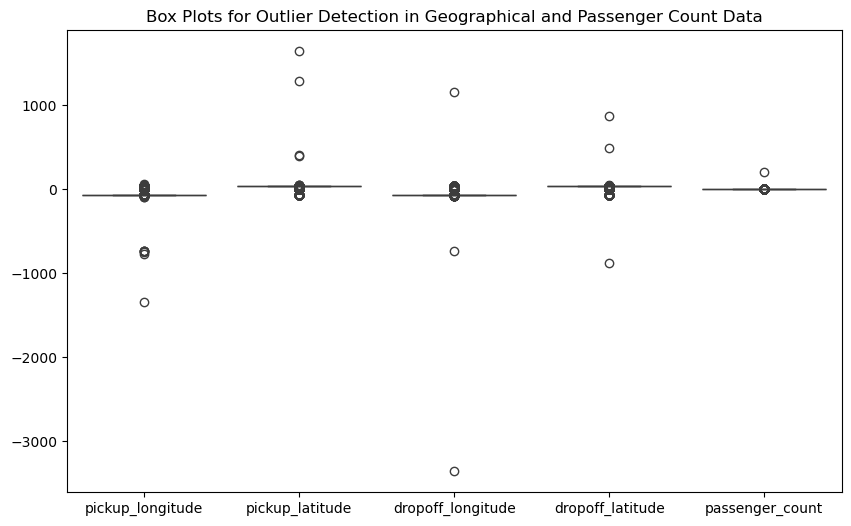

In [128]:
# Step 1: Outlier Detection Using Box Plots
# Plot box plots to visualize outliers in relevant features
features = df[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']]
plt.figure(figsize=(10, 6))
sns.boxplot(data=features)
plt.title("Box Plots for Outlier Detection in Geographical and Passenger Count Data")
plt.show()

In [130]:
# Step 2: Define a function to remove outliers using the IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [132]:
# Apply the function to remove outliers from relevant columns
columns_to_check = ['fare_amount', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']
data_cleaned = df.copy()

In [134]:
for column in columns_to_check:
    data_cleaned = remove_outliers(data_cleaned, column)

In [136]:
# Display the dataset shape before and after outlier removal
print("Original dataset shape:", df.shape)
print("Cleaned dataset shape:", data_cleaned.shape)

Original dataset shape: (199999, 10)
Cleaned dataset shape: (148074, 10)


In [162]:
data_cleaned.shape

(148074, 8)

In [146]:
data_cleaned=data_cleaned.drop(['Unnamed: 0','key'],axis=1)

In [148]:
data_cleaned=data_cleaned.dropna()

In [164]:
data_cleaned.shape

(148074, 8)

In [152]:
corr_matrix = data_cleaned.corr()
corr_matrix

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,price
fare_amount,1.000000,-0.052798,-0.076539,-0.023167,-0.094152,0.019572,0.006046,0.658270
pickup_longitude,-0.052798,1.000000,0.693656,0.409016,0.353741,-0.022952,0.013539,-0.029072
pickup_latitude,-0.076539,0.693656,1.000000,0.334680,0.499956,-0.019989,0.034327,-0.028364
dropoff_longitude,-0.023167,0.409016,0.334680,1.000000,0.651683,-0.016413,0.000404,-0.021269
dropoff_latitude,-0.094152,0.353741,0.499956,0.651683,1.000000,-0.013321,0.026124,-0.048240
passenger_count,0.019572,-0.022952,-0.019989,-0.016413,-0.013321,1.000000,0.034175,0.035686
hour,0.006046,0.013539,0.034327,0.000404,0.026124,0.034175,1.000000,0.690884
price,0.658270,-0.029072,-0.028364,-0.021269,-0.048240,0.035686,0.690884,1.000000


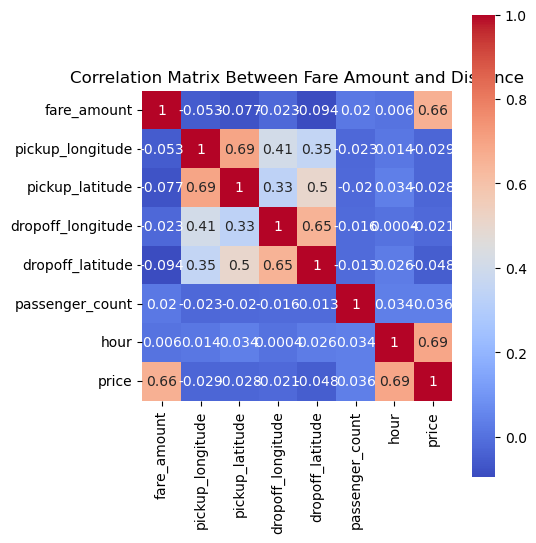

In [154]:
# Step 4: Check correlation between fare and distance
plt.figure(figsize=(5, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix Between Fare Amount and Distance')
plt.show()

In [156]:
# Define feature (X) and target (y)
X = data_cleaned.drop(['fare_amount'],axis=1)
y = data_cleaned['fare_amount']

In [158]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [160]:
# Step 5: Initialize and evaluate regression models
# Linear Regression Model
LR = LinearRegression()
LR.fit(X_train, y_train)
y_pred_lr = LR.predict(X_test)
print("\nLinear Regression:")
print(f"R2 Score: {r2_score(y_test, y_pred_lr)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_lr)}")
print(f"MSE: {mean_squared_error(y_test, y_pred_lr)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_lr))}")



Linear Regression:
R2 Score: 0.8177938026210745
MAE: 1.0406689909836047
MSE: 2.769487013766848
RMSE: 1.664177578795859


In [108]:
# Lasso Regression
LE = Lasso(alpha=0.1, max_iter=1000)
LE.fit(X_train, y_train)
y_pred_lasso = LE.predict(X_test)
print("\nLasso Regression:")
print(f"R2 Score: {r2_score(y_test, y_pred_lasso)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_lasso)}")
print(f"MSE: {mean_squared_error(y_test, y_pred_lasso)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_lasso))}")


Lasso Regression:
R2 Score: 0.8172441867483231
MAE: 1.0352307651459194
MSE: 2.777841032697276
RMSE: 1.6666856430344854


In [110]:
# Ridge Regression
RE = Ridge(alpha=1.0, max_iter=1000)
RE.fit(X_train, y_train)
y_pred_ridge = RE.predict(X_test)
print("\nRidge Regression:")
print(f"R2 Score: {r2_score(y_test, y_pred_ridge)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_ridge)}")
print(f"MSE: {mean_squared_error(y_test, y_pred_ridge)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_ridge))}")


Ridge Regression:
R2 Score: 0.8177880765359206
MAE: 1.04041176187167
MSE: 2.7695740487782885
RMSE: 1.6642037281469744
